In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools
import joblib

In [45]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
dataset = data.frame
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
diabetes = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')
diabetes.rename(columns={'diabetes':'target'}, inplace=True)
diabetes.to_csv('../data/raw/raw_diabetes.csv')
diabetes

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
diabetes_features = diabetes[[
    'pregnancies', 'glucose', 'diastolic', 'triceps',
#     'sepal_length_in_square', 'sepal_width_in_square', 'petal_length_in_square', 'petal_width_in_square',
    'insulin', 'bmi',
    'target'
]]

In [48]:
diabetes_features.to_csv('../data/processed/features_diabetes.csv')

In [49]:
y = diabetes['target']

In [50]:
X = diabetes.drop(['target'],axis=1)

In [51]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [52]:
trainset_path = '../data/processed/train_diabetes.csv'
testset_path = '../data/processed/test_diabetes.csv'

X_train.to_csv(trainset_path)
X_test.to_csv(testset_path)


In [53]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each parameter
C_values = np.logspace(-3, 3, 7)  # Values from 0.001 to 1000 logarithmically
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class_options = ['ovr', 'multinomial']
max_iter_values = np.random.randint(50, 500, 10)  # Random values between 50 and 500

# Randomly select values for each parameter
random_C = np.random.choice(C_values)
random_solver = np.random.choice(solver_options)
random_multi_class = np.random.choice(multi_class_options)
random_max_iter = np.random.choice(max_iter_values)

# Create a dictionary with the randomly initialized parameters
random_clf_params = {
    'C': random_C,
    'solver': random_solver,
    'multi_class': random_multi_class,
    'max_iter': random_max_iter
}


logreg = LogisticRegression(**random_clf_params, random_state=42)
model_path = ('../models/model.joblib')
joblib.dump(logreg, model_path)

logreg.fit(X_train,y_train)

LogisticRegression(C=1000.0, max_iter=106, multi_class='multinomial',
                   random_state=42, solver='newton-cg')

In [54]:
# Step 7 : predict model
y_pred = logreg.predict(X_test)

In [55]:
# Step 8 : model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, accuracy_score, log_loss

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:
cm = confusion_matrix(y_test,y_pred)

In [58]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    
    return plt.gcf()

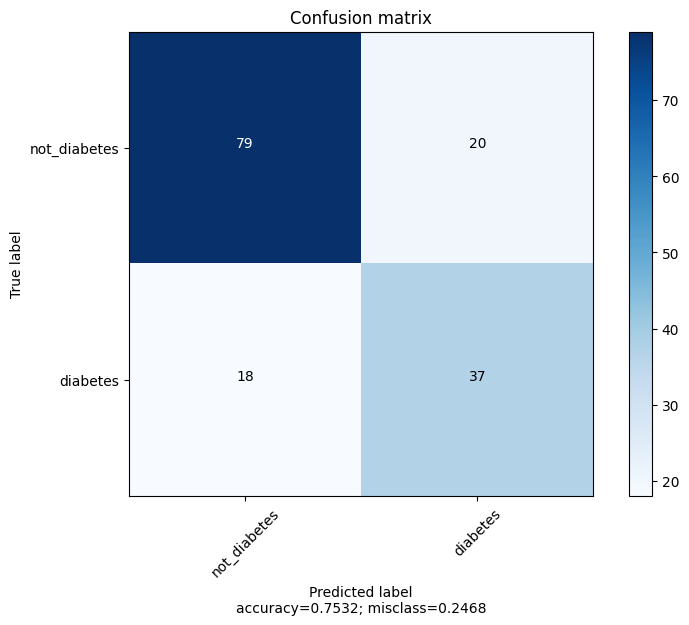

In [59]:
cm_plot = plot_confusion_matrix(cm, target_names=['not_diabetes','diabetes'], normalize=False)

In [60]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [62]:
f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
loss = log_loss(y_true=y_test, y_pred=y_pred)

In [63]:
metrics_file = '../reports/metrics.json'

metrics = {
    'f1': f1,
    'accuracy': accuracy,
    'loss': loss
}

with open(metrics_file, 'w') as mf:
    json.dump(
        obj=metrics,
        fp=mf,
        indent=4
    )

In [64]:
# Save confusion matrix image
confusion_matrix_image = '../reports/confusion_matrix.png'
cm_plot.savefig(confusion_matrix_image)